<a href="https://colab.research.google.com/github/shirishgiri/fruit/blob/main/fruits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_dir = "/content/drive/MyDrive/Ready_Dataset/train"
valid_dir = "/content/drive/MyDrive/Ready_Dataset/valid"
test_dir = "/content/drive/MyDrive/Ready_Dataset/test"

In [ ]:
img_size = 224 #data augmentation
batch_size = 32

train_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

valid_gen = ImageDataGenerator(rescale=1/255)
test_gen  = ImageDataGenerator(rescale=1/255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_data = valid_gen.flow_from_directory(
    valid_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2420 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 307 images belonging to 10 classes.


In [ ]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,401,226 (169.38 MB)

 Trainable params: 44,401,226 (169.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
) #model compilation

In [ ]:
history = model.fit(
    train_data,
    epochs=25,
    validation_data=valid_data
) #model traning

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 647s 8s/step - accuracy: 0.1517 - loss: 2.2561 - val_accuracy: 0.3700 - val_loss: 1.7676
Epoch 2/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 391s 5s/step - accuracy: 0.3311 - loss: 1.8232 - val_accuracy: 0.4433 - val_loss: 1.5416
Epoch 3/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 390s 5s/step - accuracy: 0.3799 - loss: 1.6527 - val_accuracy: 0.5400 - val_loss: 1.4448
Epoch 4/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 387s 5s/step - accuracy: 0.4128 - loss: 1.5811 - val_accuracy: 0.5233 - val_loss: 1.3567
Epoch 5/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 385s 5s/step - accuracy: 0.4670 - loss: 1.4815 - val_accuracy: 0.5367 - val_loss: 1.2924
Epoch 6/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 445s 5s/step - accuracy: 0.4963 - loss: 1.4314 - val_accuracy: 0.5733 - val_loss: 1.2293
Epoch 7/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 380s 5s/step - accuracy: 0.5113 - loss: 1.3657 - val_accuracy: 0.5800 - val_loss: 1.1471
Epoch 8/25
76/76 ━━━━━━━━━━━━━━━━━━━━ 376s 5s/step - accuracy: 0.5408 - loss: 1.2887 - val_accuracy: 0.6367 - v

In [ ]:
test_loss, test_acc = model.evaluate(test_data) #model unseen test
print("Test Accuracy:", test_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5521 - loss: 1.2862
Test Accuracy: 0.6058632135391235


In [ ]:
true_labels = test_data.classes

class_names = list(test_data.class_indices.keys())

pred_prob = model.predict(test_data)

pred_labels = np.argmax(pred_prob, axis=1)
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))

10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step
Classification Report:
              precision    recall  f1-score   support

       apple       0.77      0.36      0.49        28
     avocado       0.59      0.65      0.62        34
      banana       0.51      0.56      0.54        34
      cherry       0.88      0.62      0.72        34
        kiwi       0.78      0.62      0.69        34
       mango       0.56      0.19      0.28        27
      orange       0.59      0.86      0.70        28
  pinenapple       0.54      0.89      0.68        28
 stawberries       0.47      0.96      0.63        26
  watermelon       0.70      0.41      0.52        34

    accuracy                           0.61       307
   macro avg       0.64      0.61      0.59       307
weighted avg       0.65      0.61      0.59       307



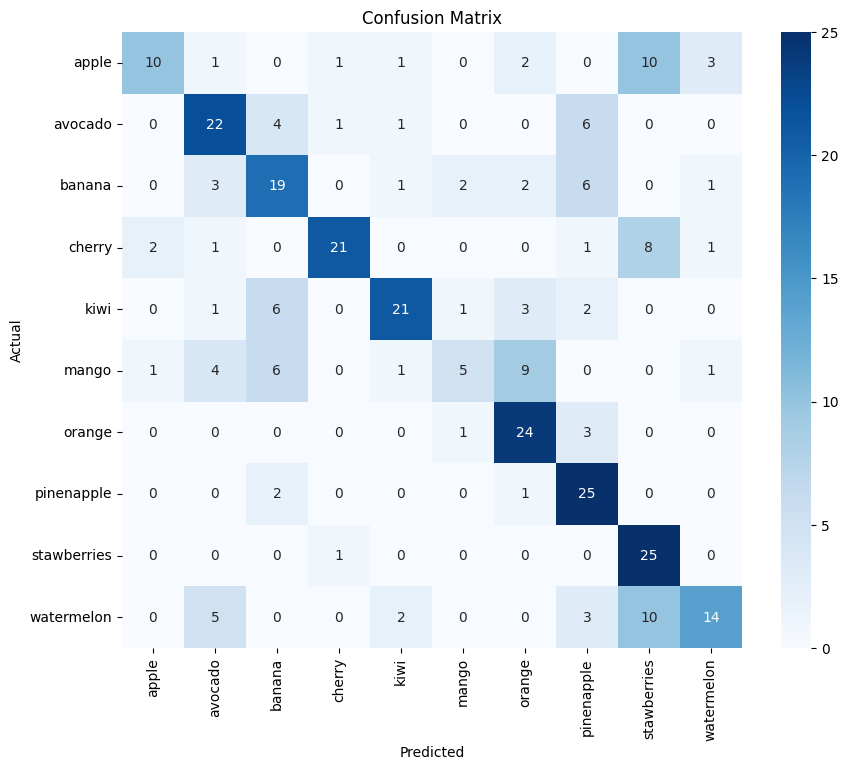

In [ ]:
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/fruit_Class_model.h5")
print("Model Saved!")

Model Saved!
